# LSTM based auto encoders 

# 1. Reconstruction fo sequence using autoencoders 

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense 
from keras.layers import RepeatVector 
from keras.layers import TimeDistributed 
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
# input sequence 
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
sequence= sequence.reshape((1,len(sequence),1))
sequence.shape

(1, 9, 1)

In [3]:
model=Sequential([
    LSTM(100,activation='relu',input_shape=(sequence.shape[1],1)),
    RepeatVector(len(sequence)),
    LSTM(100,activation='relu',return_sequences=True ),
    TimeDistributed(Dense(1))
])

In [4]:
model.compile(optimizer='adam',loss='mse')
model.fit(sequence,sequence,epochs=300, verbose=0)

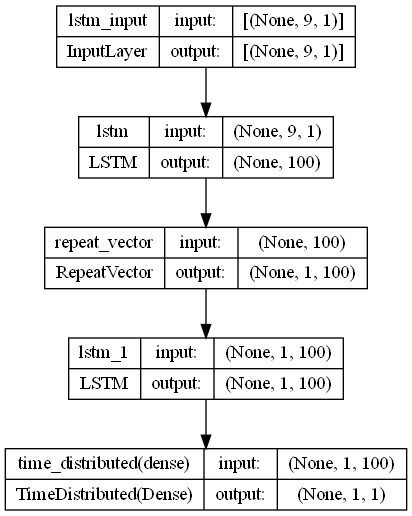

In [10]:
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
# yhat = model.predict(sequence, verbose=0)
# print(yhat[0,:,0])
# plt.show()

In [12]:
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])


[0.50000006]
